In [1]:
from pylab import *

In [2]:
import cv2

In [3]:
imagen = cv2.imread('img/billar.png')

In [4]:
rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
hsv = cv2.cvtColor(imagen, cv2.COLOR_BGR2HSV)

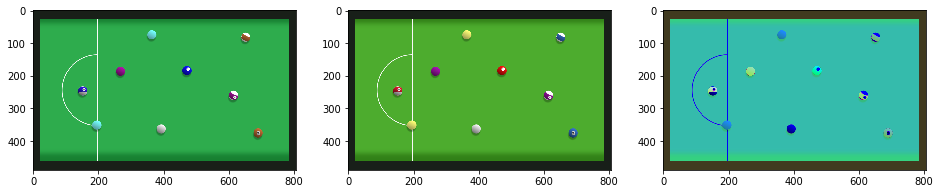

In [5]:
_, (ax1, ax2, ax3) = subplots(1, 3, figsize=(16,4))

ax1.imshow(imagen)
ax2.imshow(rgb)
ax3.imshow(hsv)

show()

In [6]:
# Extraer fondo verde

verde_bajos = np.array([50,1,1])
verde_altos = np.array([100, 254, 254])
fondo = cv2.inRange(hsv, verde_bajos, verde_altos)

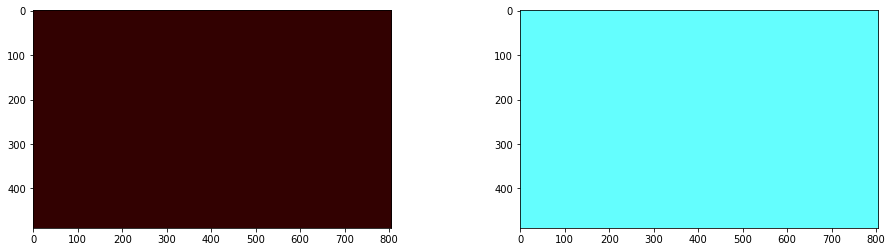

In [7]:
A = zeros_like(imagen)
B = zeros_like(imagen)

A[:,:,:] = verde_bajos
B[:,:,:] = verde_altos

_, (ax1, ax2) = subplots(1, 2, figsize=(16, 4))
ax1.imshow(A)
ax2.imshow(B)

show()

In [8]:
fondo.shape

(489, 806)

In [9]:
bolas = cv2.bitwise_not(fondo)

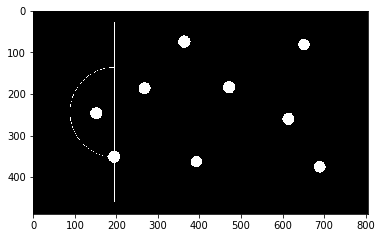

In [10]:
imshow(bolas, cmap="gray")

show()

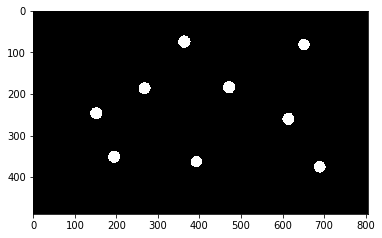

In [11]:
#Eliminar ruido
kernel = ones((3,3),np.uint8)
bolas = cv2.morphologyEx(bolas,cv2.MORPH_OPEN,kernel)
bolas = cv2.morphologyEx(bolas,cv2.MORPH_CLOSE,kernel)

imshow(bolas, cmap="gray")
show()

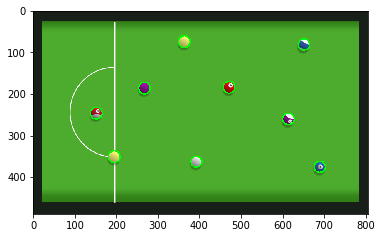

In [12]:
#Buscar los contornos de las bolas y los dibujar en verde
contours,_ = cv2.findContours(bolas, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(rgb, contours, -1, (0,255,0), 2)
imshow(rgb)
show()

In [13]:
len(contours)

9

In [14]:
font = cv2.FONT_HERSHEY_SIMPLEX

In [15]:
#Buscar el centro de las bolas y pintar en rojo
for i in contours:
    #Calcular el centro a partir de los momentos
    momentos = cv2.moments(i)
    
    cx = int(momentos['m10']/momentos['m00'])
    cy = int(momentos['m01']/momentos['m00'])
 
    #Dibujar el centro
    cv2.circle(rgb,(cx, cy), 3, (0,0,255), -1)
 
    #Escribir las coordenadas del centro
    cv2.putText(rgb,"(x: " + str(cx) + ", y: " + str(cy) + ")",(cx+10,cy+10), font, 0.5,(255,255,255),1)

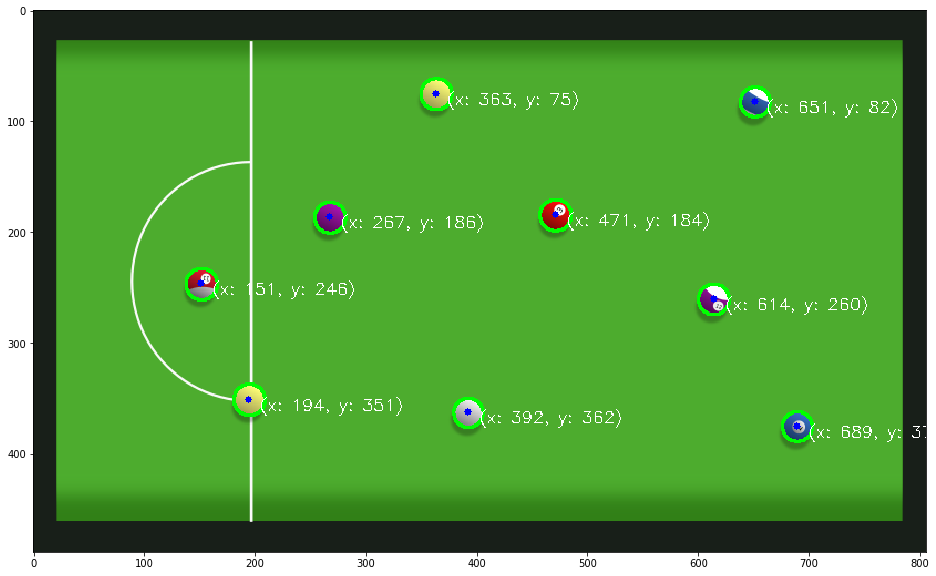

In [16]:
_, (ax1) = subplots(1, 1, figsize=(16,16))
ax1.imshow(rgb)
show()